In [8]:
# !wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

In [1]:
import os
import zipfile

local_zip = './tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

file extracted

In [2]:
base_dir = './tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_cat_fnames=os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['.ipynb_checkpoints', 'cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1001
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

4x4

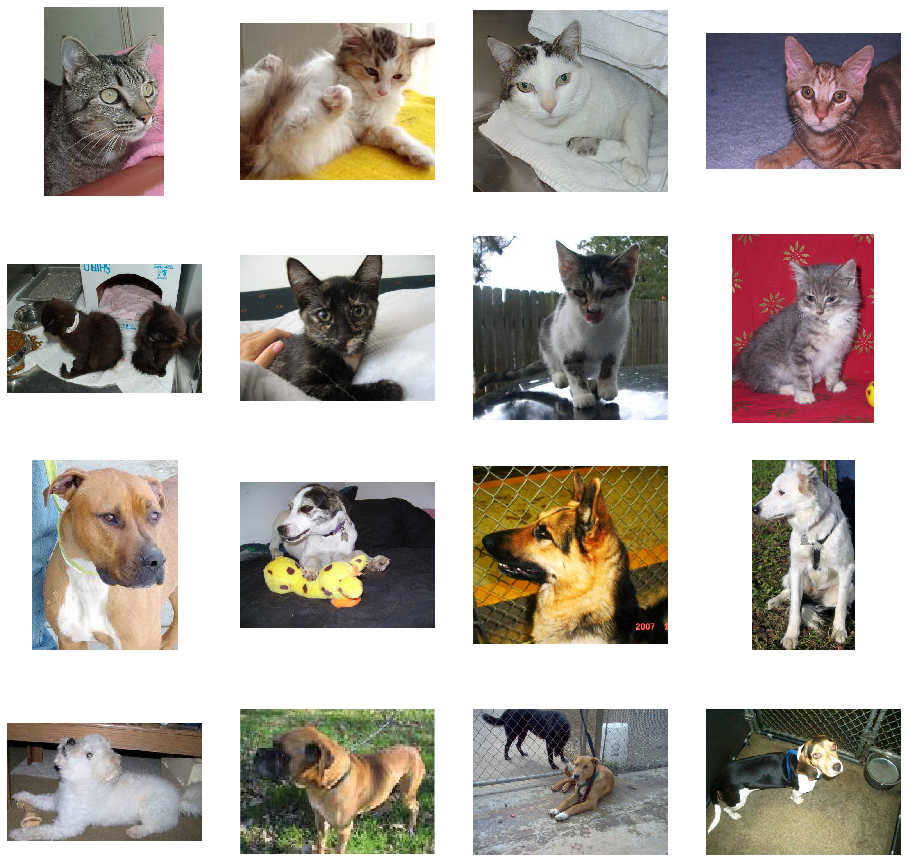

In [12]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]
                
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    # subplot 설정 ; 서브플롯 인덱스는 1부터 시작
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [13]:
# pip install tensorflow==2.0

In [14]:
# pip install keras

In [15]:
import tensorflow as tf

In [16]:
# tf.__version__

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [18]:
# pip3 install tensorflow --upgrade --force-reinstall
# pip uninstall tensorflow
# pip install --upgrade tensorflow==1.5.0

In [19]:
# 150x159 pixcels, and 3 color (R,G,B)
img_input = layers.Input(shape=(150, 150, 3))

# 첫번째 컨볼루션(3x3인 16개 필터 추출)
x = layers.Conv2D(16, 3, activation = 'relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# 두번째 컨볼루션(3x3인 32개 필터 추출)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)

# 세번째 콘불루션(3x3 인 64개 필터 추출)
x = layers.Conv2D(64, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(2)(x)

In [20]:
# 1 차원 텐서로 병합하여 완전히 연결된 레이어를 추가 할 수 있다
x = layers.Flatten()(x)

# relu 활성화 및 512개의 히든유닛
x = layers.Dense(512, activation = 'relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [22]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# all images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2003 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/15
100/100 - 60s - loss: 0.7577 - acc: 0.5537 - val_loss: 0.6642 - val_acc: 0.6340
Epoch 2/15
100/100 - 54s - loss: 0.6373 - acc: 0.6717 - val_loss: 0.5940 - val_acc: 0.6790
Epoch 3/15
100/100 - 54s - loss: 0.5556 - acc: 0.7211 - val_loss: 0.5723 - val_acc: 0.7160
Epoch 4/15
100/100 - 53s - loss: 0.4622 - acc: 0.7721 - val_loss: 0.5733 - val_acc: 0.7130
Epoch 5/15
100/100 - 54s - loss: 0.3760 - acc: 0.8311 - val_loss: 0.6662 - val_acc: 0.6960
Epoch 6/15
100/100 - 56s - loss: 0.3069 - acc: 0.8684 - val_loss: 0.7807 - val_acc: 0.6660
Epoch 7/15
100/100 - 56s - loss: 0.2215 - acc: 0.9133 - val_loss: 0.8902 - val_acc: 0.6960
Epoch 8/15
100/100 - 54s - loss: 0.1646 - acc: 0.9365 - val_loss: 0.8229 - val_acc: 0.7260
Epoch 9/15
100/100 - 53s - loss: 0.1241 - acc: 0.9501 - val_loss: 1.0382 - val_acc: 0.7170
Epoch 10/15
100/100 - 53s - loss: 0.0689 - acc: 0.9753 - val_loss: 1.4669 - val_acc: 0.6750
Epoch 11/15
100/100 - 58s - loss: 0.0514 - acc: 0.9823 - val_loss: 1.5290 - val_acc: 0.70

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


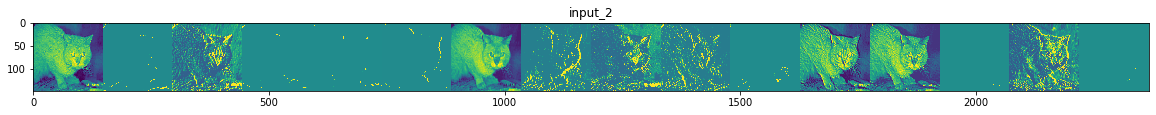

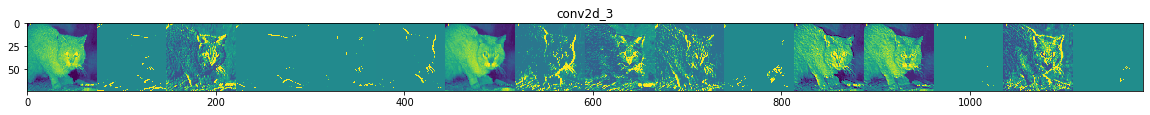

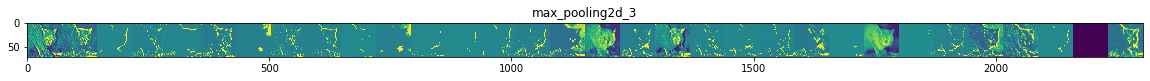

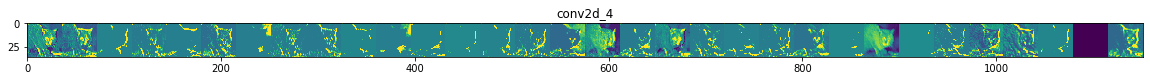

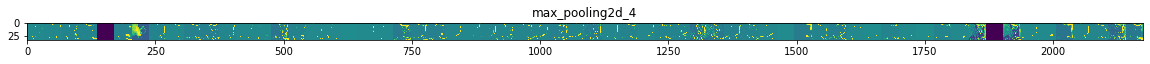

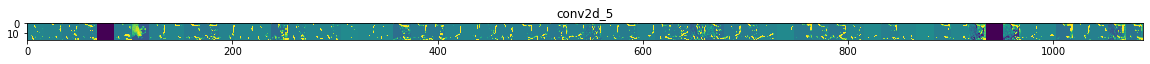

In [25]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

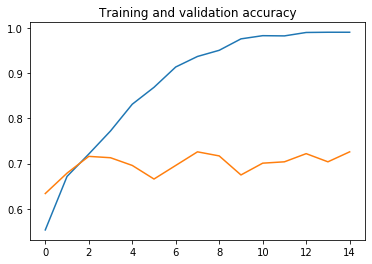

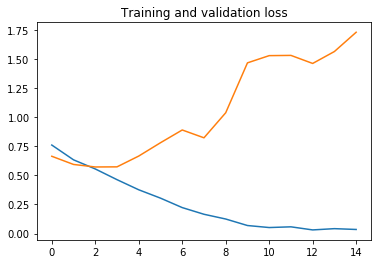

In [26]:

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')




In [27]:
pip install signal

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement signal (from versions: none)
ERROR: No matching distribution found for signal


In [28]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

AttributeError: module 'signal' has no attribute 'SIGKILL'